In [ ]:
import numpy as np
import scipy.special
import matplotlib.pyplot as plt

In [ ]:
class neuralNetwork:

  def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
    self.inodes = inputnodes
    self.hnodes = hiddennodes
    self.onodes = outputnodes
    self.learningrate = learningrate
    self.wih = np.random.normal(0.0, pow(self.hnodes, -0.5), (self.hnodes, self.inodes))
    self.woh = np.random.normal(0.0, pow(self.onodes, -0.5), (self.onodes, self.hnodes))
    self.activasion_function = lambda x: scipy.special.expit(x)
    self.inverseactivasion_function = lambda x: scipy.special.logit(x)

  def train(self, input_list, target_list):
    targets = np.array(target_list, ndmin=2).T
    inputs = np.array(input_list, ndmin=2).T
    hidden_inputs = np.dot(self.wih, inputs)
    hidden_outputs = self.activasion_function(hidden_inputs)
    final_inputs = np.dot(self.woh, hidden_outputs)
    final_outputs = self.activasion_function(final_inputs)
    output_errors = targets - final_outputs
    hidden_errors = np.dot(self.woh.T, output_errors)
    self.woh += self.learningrate * np.dot((output_errors * final_outputs * (1.0 - final_outputs)), np.transpose(hidden_outputs)) #how erros change when output weights change, we use derivatives
    self.wih += self.learningrate * np.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), np.transpose(inputs))
    
  def query(self, input_list):
    inputs = np.array(input_list, ndmin=2).T
    hidden_inputs = np.dot(self.wih, inputs)
    hidden_outputs = self.activasion_function(hidden_inputs)
    final_inputs = np.dot(self.woh, hidden_outputs)
    final_outputs = self.activasion_function(final_inputs)
    return final_outputs

  def train_back(self, target_list):
    final_outputs = np.array(target_list, ndmin=2).T
    final_inputs = self.inverseactivasion_function(targets)
    hidden_outputs = np.dot(self.woh.T, final_inputs)
    hidden_outputs -= np.min(hidden_outputs)
    hidden_outputs /= np.max(hidden_outputs)
    hidden_outputs *= 0.98
    hidden_outputs += 0.01
    hidden_inputs = self.inverseactivasion_function(hidden_outputs)
    final_inputs = np.dot(self.wih.T, hidden_inputs)
    final_inputs -= np.min(final_inputs)
    final_inputs /= np.max(final_inputs)
    final_inputs *= 0.98
    final_inputs += 0.01
    return final_inputs



  


In [ ]:
input_nodes = 784
hidden_nodes = 100
output_nodes = 10
learning_rate = 0.2
n = neuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)

In [ ]:
epochs = 2
data = open("/content/mnist_train_100.csv", 'r')
training_data = data.readlines()
for _ in range(epochs):
  for d in training_data:
    all_values = d.split(',')
    input = (np.asfarray(all_values[1:]) / 255 * 0.99) + 0.01
    targets = np.zeros(output_nodes) + 0.01
    targets[int(all_values[0])] = 0.99
    n.train(input, targets)


In [ ]:
test_data = open("/content/mnist_test_10.csv", 'r').readlines()
score = []
for d in training_data:
  all_values = d.split(',')
  correct_label = int(all_values[0])
  inputs = (np.asfarray(all_values[1:]) / 255 * 0.99) + 0.01
  outputs = n.query(inputs)
  lable = np.argmax(outputs)
  score.append(1) if lable == correct_label else score.append(0)
score = np.asarray(score)
print(f"accuracy --- {score.sum() / score.size * 100}%")
  

accuracy --- 95.0%


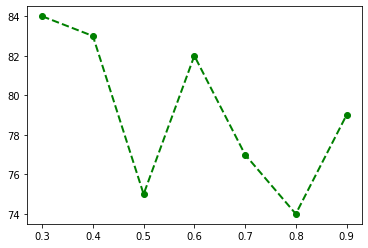

In [ ]:
neural_rates = [84.0, 83.0, 75.0, 82.0, 77.0, 74.0, 79.0]
learningrates = [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
plt.plot(learningrates, neural_rates, marker='o', linestyle='dashed', linewidth=2, color='green')

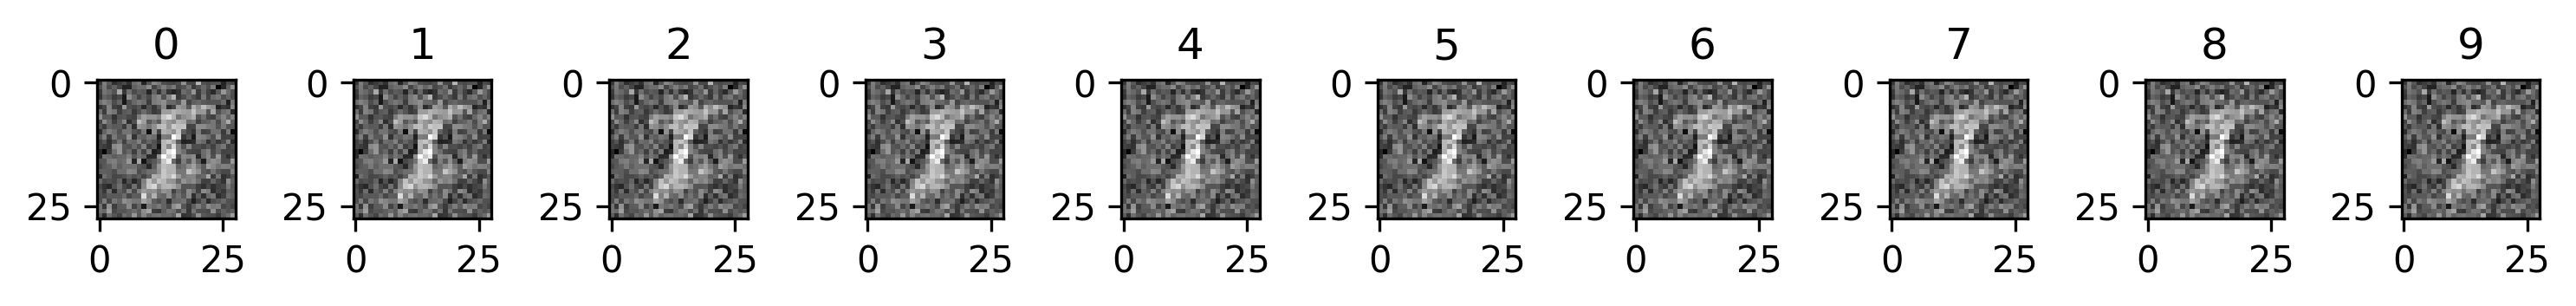

In [ ]:
target_list0 = n.train_back([0.99, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01]).reshape((28, 28))
target_list1 = n.train_back([0.01, 0.99, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01]).reshape((28, 28))
target_list2 = n.train_back([0.01, 0.01, 0.99, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01]).reshape((28, 28))
target_list3 = n.train_back([0.01, 0.01, 0.01, 0.99, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01]).reshape((28, 28))
target_list4 = n.train_back([0.01, 0.01, 0.01, 0.01, 0.99, 0.01, 0.01, 0.01, 0.01, 0.01]).reshape((28, 28))
target_list5 = n.train_back([0.01, 0.01, 0.01, 0.01, 0.01, 0.99, 0.01, 0.01, 0.01, 0.01]).reshape((28, 28))
target_list6 = n.train_back([0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.99, 0.01, 0.01, 0.01]).reshape((28, 28))
target_list7 = n.train_back([0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.99, 0.01, 0.01]).reshape((28, 28))
target_list8 = n.train_back([0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.99, 0.01]).reshape((28, 28))
target_list9 = n.train_back([0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.99]).reshape((28, 28))
fig, axes = plt.subplots(nrows = 1, ncols = 10, dpi = 300, figsize = (10, 3))
axes[0].set_title('0')
axes[0].imshow(target_list0, cmap='gray')
axes[1].set_title('1')
axes[1].imshow(target_list1, cmap='gray')
axes[2].set_title('2')
axes[2].imshow(target_list2, cmap='gray')
axes[3].set_title('3')
axes[3].imshow(target_list3, cmap='gray')
axes[4].set_title('4')
axes[4].imshow(target_list4, cmap='gray')
axes[5].set_title('5')
axes[5].imshow(target_list5, cmap='gray')
axes[6].set_title('6')
axes[6].imshow(target_list6, cmap='gray')
axes[7].set_title('7')
axes[7].imshow(target_list7, cmap='gray')
axes[8].set_title('8')
axes[8].imshow(target_list8, cmap='gray')
axes[9].set_title('9')
axes[9].imshow(target_list9, cmap='gray')
plt.tight_layout()